In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-24 10:10:53.228177: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-08-24 10:10:53.228365: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-08-24 10:10:53.228372: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1756005053.228623 46391659 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1756005053.228844 46391659 pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True

(266, 190, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


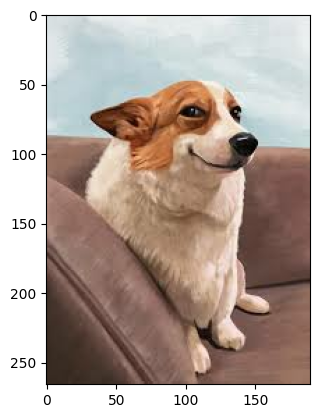

In [4]:
image_path = "1.jpeg"
image_tensor = tf.io.decode_image(tf.io.read_file(image_path))
print(image_tensor.shape)
print(type(image_tensor))
plt.imshow(image_tensor)

In [5]:
IMG_width, IMG_height = 256,256
image_tensor = tf.image.resize(image_tensor, [IMG_width, IMG_height])
print(image_tensor.shape)
print(type(image_tensor))


(256, 256, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
image_tensor = tf.expand_dims(image_tensor, 0) 
print(image_tensor.shape) 

(1, 256, 256, 3)


In [8]:
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2), # Rotate by a factor of 0.2 (approx. 72 degrees)
    tf.keras.layers.RandomZoom(0.2), # Zoom in or out by 20%
    tf.keras.layers.RandomContrast(0.2), # Adjust contrast by 20%
])

(-0.5, 255.5, 255.5, -0.5)

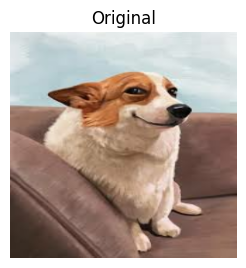

In [9]:
plt.figure(figsize=(10, 10))
original_image = image_tensor[0] / 255.0  # Normalize for plotting
plt.subplot(3, 3, 1)
plt.imshow(original_image)
plt.title("Original")
plt.axis("off")

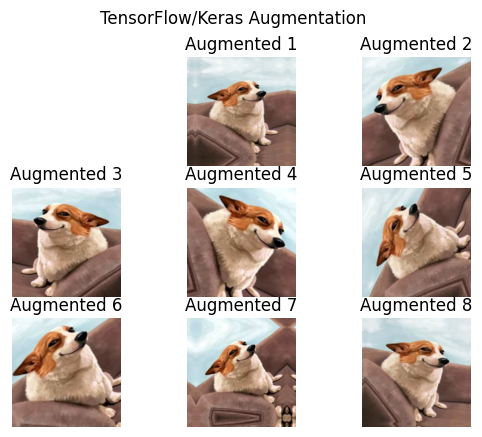

In [10]:
for i in range(8):
    augmented_image = data_augmentation_layers(image_tensor)
    plt.subplot(3, 3, i + 2)
    # The output of layers is a float tensor, needs clipping for display
    plt.imshow(augmented_image[0] / 255.0) 
    plt.title(f"Augmented {i+1}")
    plt.axis("off")
plt.suptitle("TensorFlow/Keras Augmentation")
plt.show()